In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import torch
sys.path.append("../src")
from exlib.segmenters.sam import SamSegmenter
from exlib.explainers.common import convert_idx_masks_to_bool
from exlib.utils import hatch_dim_and_outline, plot_masks

In [2]:
import random

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
SEED = 42
if SEED != -1:
    # Torch RNG
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    # Python RNG
    np.random.seed(SEED)
    random.seed(SEED)

cuda


In [3]:
from torchvision import datasets, transforms

ROOT_DATA_PATH = '/shared_data0/chaenyk/dataset/imagenet'

train_dir = os.path.join(ROOT_DATA_PATH, 'train')
val_dir = os.path.join(ROOT_DATA_PATH, 'val')
json_file = os.path.join(ROOT_DATA_PATH, 'imagenet_class_index.json')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_dataset = datasets.ImageFolder(train_dir, transform)
val_dataset = datasets.ImageFolder(val_dir, transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2, shuffle=False)

In [4]:
idx = 0
image, label = next(iter(test_loader))
image.shape, label.shape

(torch.Size([2, 3, 224, 224]), torch.Size([2]))

## SAM

In [ ]:
# pip install git+https://github.com/facebookresearch/segment-anything.git

In [9]:
import time
# sam vit-h
images = []
for i in range(4):
    images.append(val_dataset[i][0])
images = torch.stack(images)
print('images', images.shape)
sam_segmenter_h = SamSegmenter()
sam_segmenter_h = sam_segmenter_h.to(device)
start = time.time()
sam_segments_output_h = sam_segmenter_h(images)
print('time', time.time() - start)

images torch.Size([4, 3, 224, 224])
time 23.0877788066864


In [10]:
import time
# sam vit-h
images = []
for i in range(8):
    images.append(val_dataset[i][0])
images = torch.stack(images)
print('images', images.shape)
sam_segmenter_h = SamSegmenter()
sam_segmenter_h = sam_segmenter_h.to(device)
start = time.time()
sam_segments_output_h = sam_segmenter_h(images)
print('time', time.time() - start)

images torch.Size([8, 3, 224, 224])
time 48.841609954833984


Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)


time 13.037959098815918


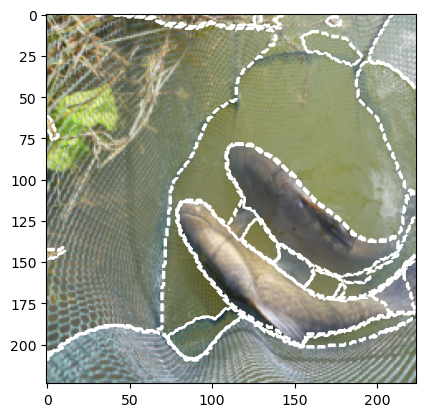

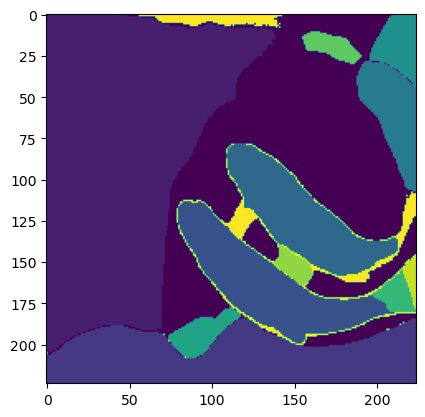

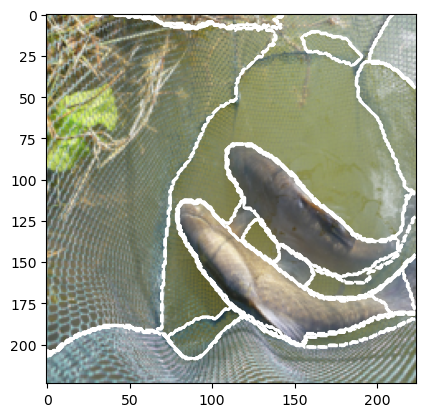

In [5]:
import time
# sam vit-h
sam_segmenter_h = SamSegmenter()
sam_segmenter_h = sam_segmenter_h.to(device)
start = time.time()
sam_segments_output_h = sam_segmenter_h(image)
print('time', time.time() - start)
sam_segments_output_all_h = sam_segments_output_h.segmenter_output['segments_all']
plot_masks(image[0].permute(1,2,0), sam_segments_output_all_h[0])

sam_segments_bool_h = convert_idx_masks_to_bool(sam_segments_output_h.segments[0].unsqueeze(0))

plt.figure()
plt.imshow(sam_segments_output_h.segments[0])
plt.show()

plot_masks(image[0].permute(1,2,0), sam_segments_bool_h)

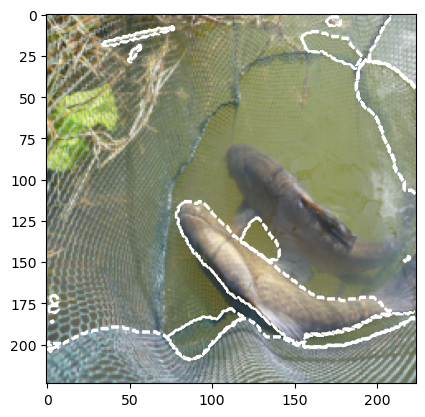

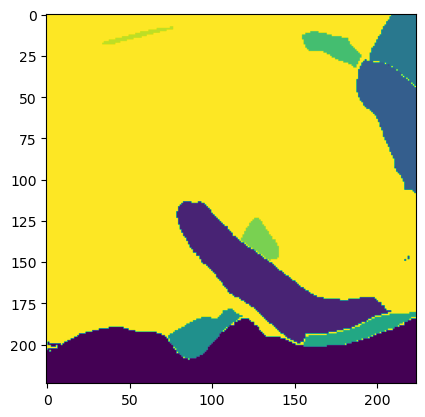

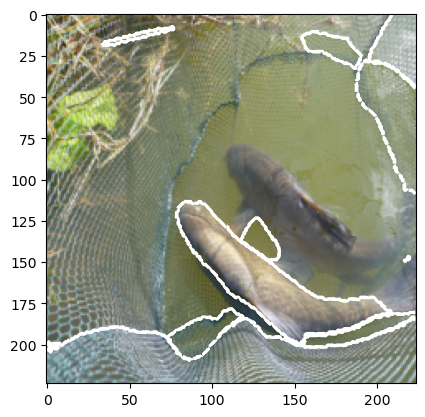

In [7]:
# sam vit-b
sam_segmenter = SamSegmenter(model_name='vit_b')
sam_segmenter = sam_segmenter.to(device)
sam_segments_output = sam_segmenter(image)
sam_segments_output_all = sam_segments_output.segmenter_output['segments_all']
plot_masks(image[0].permute(1,2,0), sam_segments_output_all[0])

sam_segments_bool = convert_idx_masks_to_bool(sam_segments_output.segments[0].unsqueeze(0))

plt.figure()
plt.imshow(sam_segments_output.segments[0])
plt.show()

plot_masks(image[0].permute(1,2,0), sam_segments_bool)

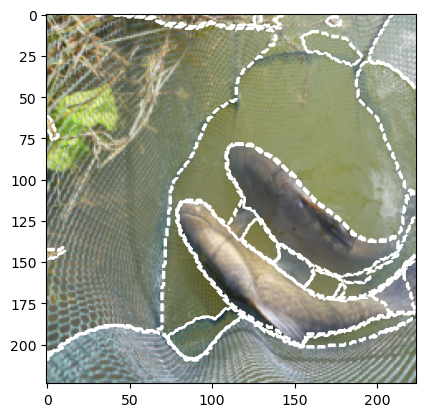

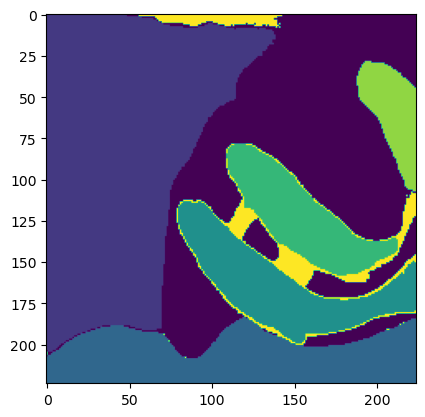

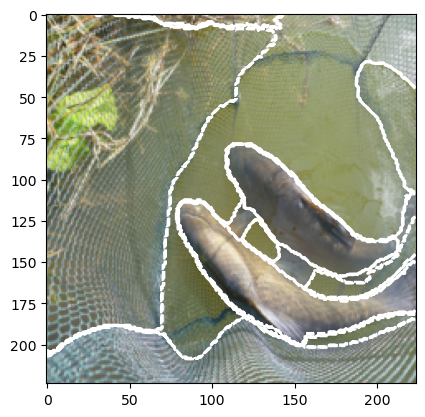

In [8]:
# sam vit-h
sam_segmenter_h = SamSegmenter(seg_min_size=1000)
sam_segmenter_h = sam_segmenter_h.to(device)
sam_segments_output_h = sam_segmenter_h(image)
sam_segments_output_all_h = sam_segments_output_h.segmenter_output['segments_all']
plot_masks(image[0].permute(1,2,0), sam_segments_output_all_h[0])

sam_segments_bool_h = convert_idx_masks_to_bool(sam_segments_output_h.segments[0].unsqueeze(0))

plt.figure()
plt.imshow(sam_segments_output_h.segments[0])
plt.show()

plot_masks(image[0].permute(1,2,0), sam_segments_bool_h)